# Mini Project

## 자전거 수요량 예측 데이터 분석  
https://www.kaggle.com/c/bike-sharing-demand



### 1. 가설 설정
데이터 분석 전에 데이터 간의 연관성에 대한 임의의 가설 설정하기

### 2. 데이터 시각화 
4종류 이상의 시각화 기법을 사용하여 그래프 그리기
Seaborn 라이브러리 활용

### 3. 데이터 분석
각 그래프로부터 얻을 수 있는 의미 도출

### 4. 최초의 가설 검정
가설이 유의미한지 여부 판단하기

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 읽어드릴 파일 경로 : /dataset/bike_sharing_demand_train.csv
filepath = "./dataset/bike_sharing_demand_train.csv"
data = pd.read_csv(filepath)

In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## [추가] 날짜 데이터 파싱

In [4]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
# 데이터 타입 변경: object -> datetime
data['datetime'] = data['datetime'].astype('datetime64')

In [6]:
data.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [7]:
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute
data['second'] = data['datetime'].dt.second

data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


# 가설

### 1.겨울보다는 여름에 많이 탈것이다. -> 겨울도 대여량 많음
### 2. 출퇴근시간에 이용량이 다른시간에 비해 상대적으로 많을 것이다. -> 맞음.
### 3. 주말보다는 평일에 더 이용량이 많을것이다.
### 4. 온도가 높으면 이용량이 줄 것이다.

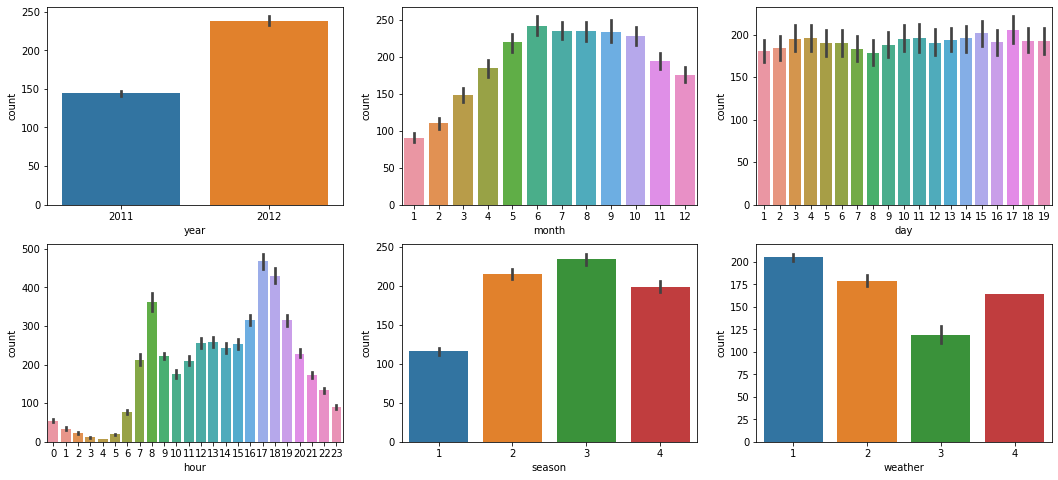

In [11]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

figure.set_size_inches(18, 8)



sns.barplot(data=data, x="year", y="count", ax=ax1)
sns.barplot(data=data, x="month", y="count", ax=ax2)
sns.barplot(data=data, x="day", y="count", ax=ax3)
sns.barplot(data=data, x="hour", y="count", ax=ax4)
sns.barplot(data=data, x="season", y="count", ax=ax5)
sns.barplot(data=data, x="weather", y="count", ax=ax6)


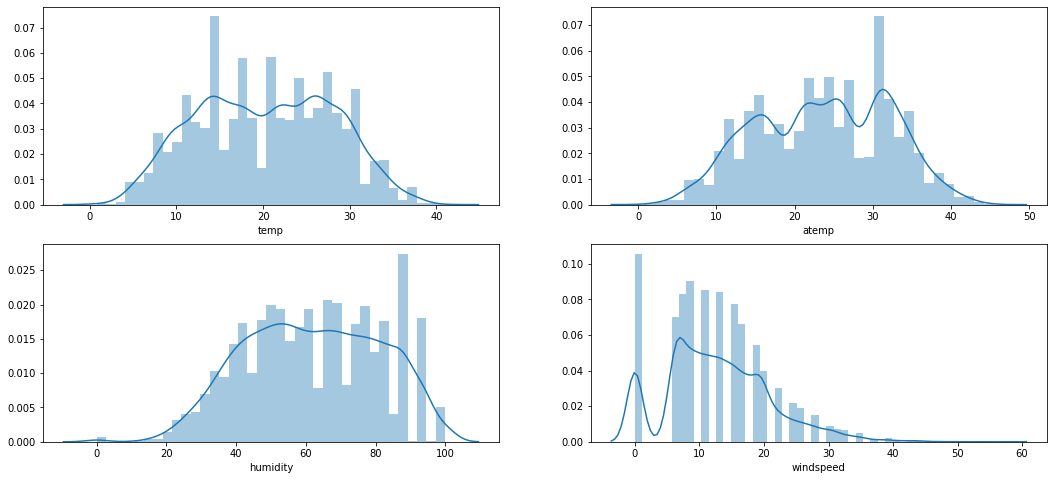

In [10]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

figure.set_size_inches(18, 8)

sns.distplot(data.temp, ax=ax1)
sns.distplot(data.atemp, ax=ax2)
sns.distplot(data.humidity, ax=ax3)
sns.distplot(data.windspeed, ax=ax4)

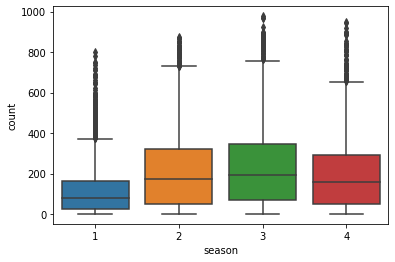

In [13]:
sns.boxplot(x='season', y='count', data = data)

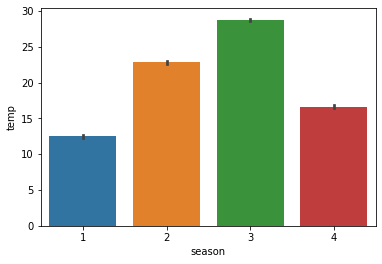

In [14]:
sns.barplot(x='season', y='temp', data = data)

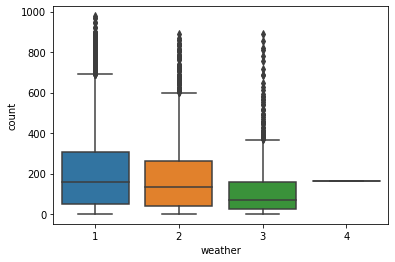

In [15]:
sns.boxplot(x='weather', y='count', data =data)

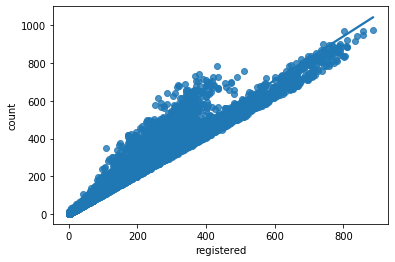

In [16]:
sns.regplot(x= 'registered', y ='count', data = data)

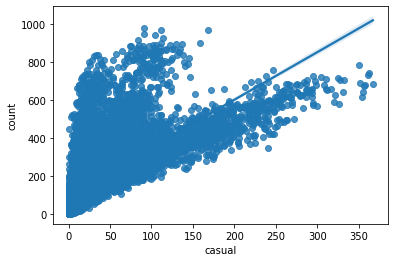

In [17]:
sns.regplot(x= 'casual', y ='count', data = data)

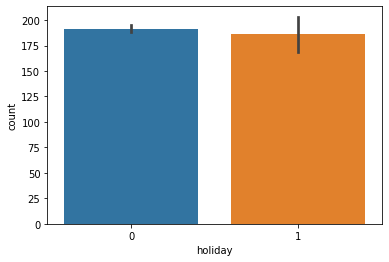

In [18]:
sns.barplot(x='holiday', y='count', data = data)

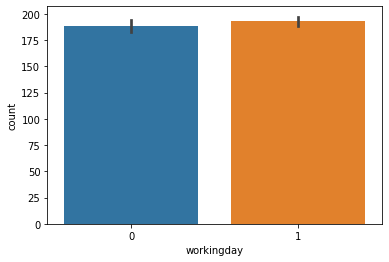

In [19]:
sns.barplot(x='workingday', y='count', data = data)